In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:
# Cargar los datos
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalizar los datos de imágenes al rango [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Redimensionar los datos para que tengan un canal (formato de entrada de CNN)
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Convertir etiquetas a one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


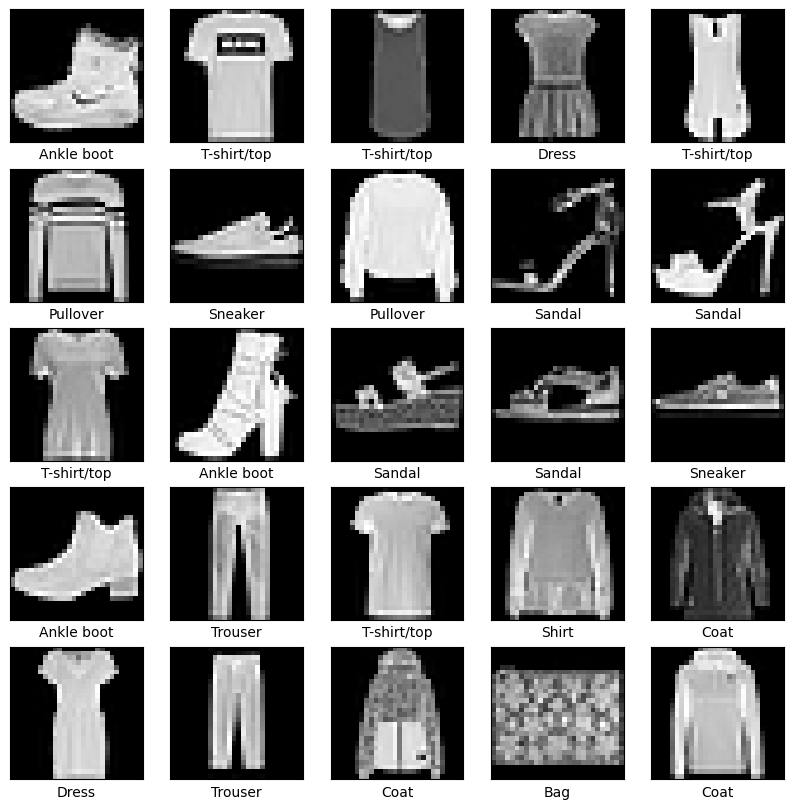

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.xlabel(class_names[np.argmax(train_labels[i])])
plt.show()


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=64,
                    validation_data=(test_images, test_labels))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 66s 68ms/step - accuracy: 0.6605 - loss: 0.9133 - val_accuracy: 0.8291 - val_loss: 0.4489
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 65ms/step - accuracy: 0.8210 - loss: 0.4864 - val_accuracy: 0.8645 - val_loss: 0.3703
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 67ms/step - accuracy: 0.8523 - loss: 0.4080 - val_accuracy: 0.8794 - val_loss: 0.3284
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 65ms/step - accuracy: 0.8622 - loss: 0.3728 - val_accuracy: 0.8833 - val_loss: 0.3166
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 65ms/step - accuracy: 0.8749 - loss: 0.3441 - val_accuracy: 0.8915 - val_loss: 0.2942
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 68ms/step - accuracy: 0.8792 - loss: 0.3276 - val_accuracy: 0.8901 - val_loss: 0.2909
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 64ms/step - accuracy: 0.8866 - loss: 0.3132 - val_accuracy: 0.8945 - val_loss: 0.2855
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 65ms/step - accuracy: 0.8905 - loss: 0.3023 - 

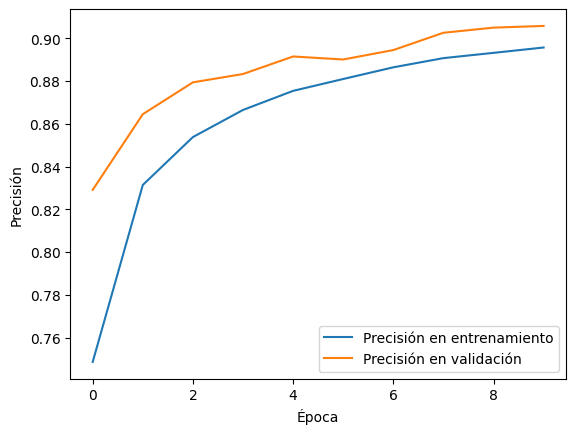

In [ ]:
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


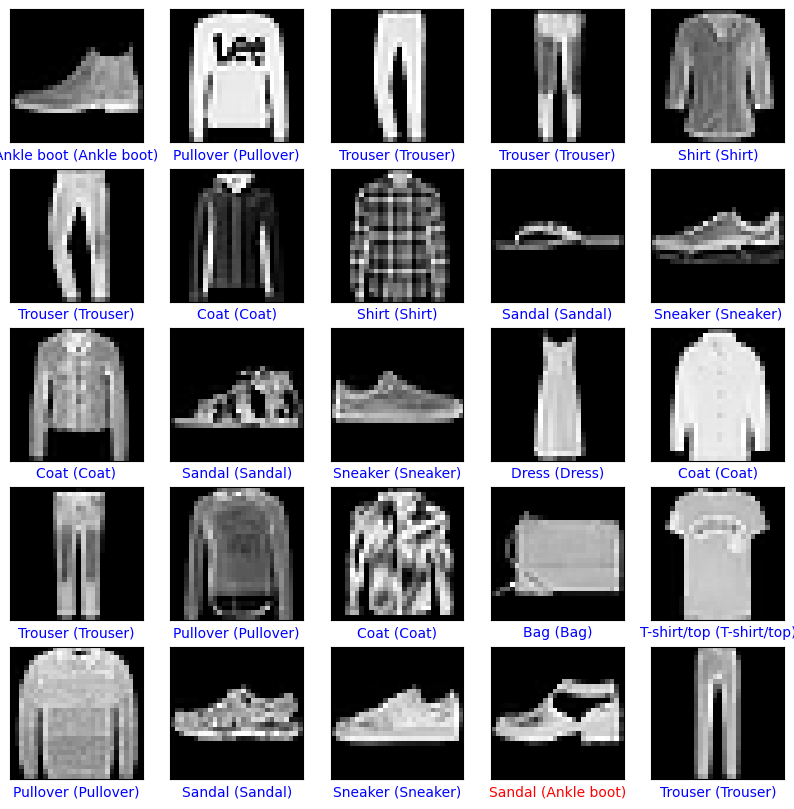

In [ ]:
predictions = model.predict(test_images)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    pred_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[np.argmax(test_labels[i])]
    color = 'blue' if pred_label == true_label else 'red'
    plt.xlabel(f"{pred_label} ({true_label})", color=color)
plt.show()


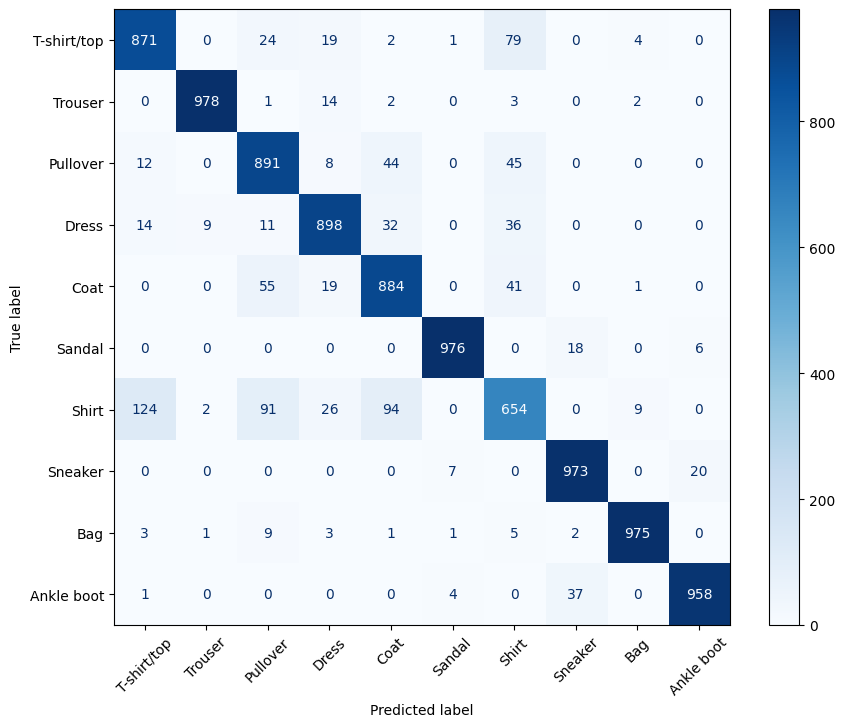

In [ ]:
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(test_labels, axis=1)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


cm = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation=45)
plt.show()


In [ ]:
model.save('fashion_mnist_model.h5')

Justificación del Problema y Dataset

El proyecto busca entrenar una red para identificar distintos tipos de ropa (camisetas, pantalones, zapatos, etc.) a partir de imágenes. Usamos el dataset Fashion MNIST, que contiene imágenes de ropa en 10 categorías, perfecto para practicar clasificación de imágenes multiclase.

Por qué Usamos una Red Neuronal Convolucional (CNN)

Las CNNs son redes diseñadas específicamente para analizar imágenes. Detectan patrones como bordes y texturas que luego combinan para clasificar las imágenes. Funcionan en tres pasos:

Capas de Convolución: Detectan detalles como líneas y formas en la imagen.

Capas de Pooling: Reducen el tamaño de las imágenes, conservando los patrones importantes.

Capas Densas: Combinan la información para decidir la categoría de la prenda.
Preprocesamiento y Entrenamiento

Normalización: Ajustamos los valores de los píxeles entre 0 y 1 para ayudar a que el modelo aprenda mejor.

One-Hot Encoding: Convertimos las etiquetas en un formato que la red entienda mejor.

Entrenamiento: El modelo ajusta sus parámetros para mejorar cada vez que ve un error en la predicción.